# Рынок заведений общественного питания Москвы

**Описание исследования**

Заказчик - небольшое кафе в Москве, где вместо официантов роботы. Необходимо подготовить исследование рынка заведений общественного питания Москвы для инвесторов.

**Цель исследования** - изучить факторы, влияющие на долгосрочный спрос, дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.

**Описание данных**

Входные данные - открытые данные о заведениях общественного питания в Москве:

Таблица rest_data:
1. id — идентификатор объекта;
2. object_name — название объекта общественного питания;
3. chain — сетевой ресторан;
4. object_type — тип объекта общественного питания;
5. address — адрес;
6. number — количество посадочных мест.

**Ход исследования**
 
Перед тем, как непосредственно перейти к анализу данных необходимо провести обзор данных и их предобработку.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Исследовательский анализ данных.
 3. Презентация.

## Обзор данных

In [281]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from io import BytesIO
import requests
import warnings
warnings.filterwarnings('ignore')

In [282]:
# Откроем датасет
data = pd.read_csv('/datasets/rest_data.csv')

In [283]:
# Получим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [284]:
# Проверим на наличие дубликатов
data.duplicated().sum()

0

In [285]:
# Проверим данные на наличие неявных дубликатов в столбце object_name
data['object_name'].unique()

array(['СМЕТАНА', 'Родник', 'Кафе «Академия»', ..., 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

In [286]:
# Проверим данные на наличие неполных дубликатов, уберем столбец id
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

In [287]:
# Изучим неполные дубликаты
data_id = data[['object_name', 'chain', 'object_type', 'address', 'number']]
data_id[data_id.duplicated(keep=False)].head(20)

,object_name,chain,object_type,address,number
2374,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3480,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4431,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4536,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
4537,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5058,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20


**Вывод:**
- Всего в таблице 6 столбцов и 15366 строк
- Пропуски в таблице не найдены
- Полные дубликаты в таблице не найдены, в столбце object_name есть много неявных дубликатов
- Также в таблице найдено 82 неполных дубликата. Так как маловероятно, что в одном месте может быть два идентичных заведения, дубликаты необходимо удалить
- Тип у данных верный

## Предобработка данных

In [288]:
# Посчитаем кол-во уникальных названий несетевых заведений
len(data.query('chain == "да"')['object_name'].unique())

724

In [289]:
# Удалим часть неявных дубликатов приведением названий к нижнему регистру
data['object_name'] = data['object_name'].str.lower()

In [290]:
# Заменим названия популярных сетей в столбце object_name с помощью функции, чтобы сократить число неявных дубликатов
def replace_name(i):
    if 'subway' in i or 'сабве' in i:
        return 'subway'
    if 'шоколадница' in i:
        return 'шоколадница'
    if 'макдоналдс' in i or "macdonald's" in i or 'macdonalds' in i:
        return 'макдоналдс'
    if 'бургер кинг' in i or 'burger king' in i:
        return 'бургер кинг'
    if 'kfc' in i or 'кфс' in i:
        return 'kfc'
    if 'мята lounge' in i or 'мята лаун' in i:
        return 'мята lounge'
    if 'старбакс' in i or 'starbucks' in i:
        return 'starbucks'
    if 'му-му' in i:
        return 'му-му'
    if 'кофе хаус' in i:
        return 'кофе хаус'
    if 'милти' in i:
        return 'милти'
    else:
        return i

In [291]:
# Применим написанную функцию для замены названий
data['object_name'] = data['object_name'].apply(replace_name)

In [292]:
# Для проверки посчитаем кол-во оставшихся уникальных названий
len(data.query('chain == "да"')['object_name'].unique())

507

In [293]:
# Удалим неполные дубликаты
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

In [294]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


**Вывод:**

Таким образом, было сокращено кол-во неявных дубликатов, а также были удалены неполные дубликаты.

## Исследовательский анализ данных

### Соотношение видов объектов общественного питания по количеству

In [295]:
# Настроим повторяющиеся параметры для будущих графиков
plt.style.use('seaborn-whitegrid')
color = sns.color_palette("flare")

# Сократим названия некоторых видов заведений для простоты графиков
data['object_type'] = data['object_type'].replace('предприятие быстрого обслуживания', 'ПБО')
data['object_type'] = data['object_type'].replace('магазин (отдел кулинарии)', 'магазин')

In [296]:
# Сгрупируем данные по виду объектов общественного питания и отсортируем по возрастанию
types = data.groupby('object_type').agg({'id': 'nunique'}).sort_values(by='id', ascending = False)
types

,id
object_type,
кафе,6071
столовая,2584
ресторан,2282
ПБО,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
магазин,273


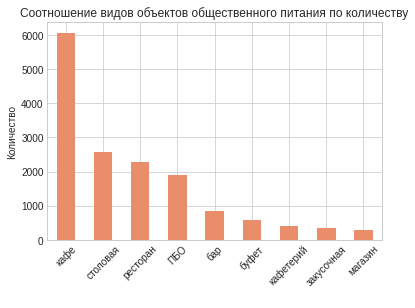

In [297]:
# Построим график
ax = types.plot.bar(color=color, legend=None)
ax.set_title('Соотношение видов объектов общественного питания по количеству')
ax.set_xlabel(' ')
ax.set_ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:**

- Топ-3 самых многочисленных видов заведений: кафе (6099), столовая (2587), ресторан (2285)
- Топ-3 самых немногочисленных: магазин (отдел кулинарии) (273), закусочная (360), кафетерий (398)
- Возможно это объясняется тем, что на кафе и столовые больше всего спроса, однако лучше проверить это еще и на срезе данных.

### Соотношение сетевых и несетевых заведений по количеству

In [298]:
# Сгрупируем данные по признаку сети и отсортируем по возрастанию
chains = data.groupby('chain').agg({'id': 'nunique'}).sort_values(by='id', ascending=False)
chains

,id
chain,
нет,12317
да,2964


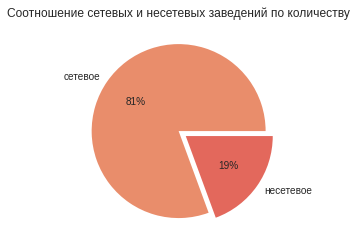

In [299]:
# Построим график
chains.plot.pie(subplots=True, ylabel=" ", legend=None, colors=color, autopct='%1.0f%%', labels=['сетевое', 'несетевое'], explode = (0, 0.1))
plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.show()

**Вывод:**

Несетевых заведений (12398) гораздо больше сетевых (2968). Это может говорить нам о том, что несетевым заведениям лучше удается закрепиться на рынке.

### Сетевые и несетевые заведения в разбивке по виду

In [300]:
types = types.reset_index().sort_values('object_type')

In [301]:
# Найдем количество сетевых заведений по виду
chain_pc = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique').reset_index()

In [302]:
# Дадим колонкам удобные названия
chain_pc.columns = ['object_type', 'chain', 'not_chain']

In [303]:
# Посчитаем количество всех заведений одного вида
chain_pc['total'] = chain_pc['chain'] + chain_pc['not_chain']

In [304]:
# Посчитаем долю сетевых заведений от каждого вида
chain_pc['share_chain'] = chain_pc['chain']/chain_pc['total']

In [305]:
# Посчитаем долю несетевых заведений от каждого вида
chain_pc['share_not_chain'] = chain_pc['not_chain']/chain_pc['total']

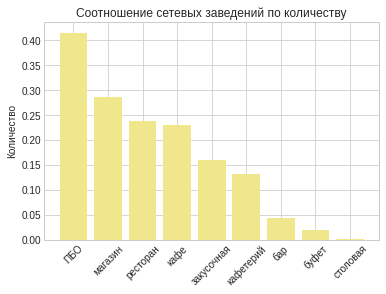

In [306]:
# Построим график
ax1 = plt.bar('object_type', 'share_chain', data=chain_pc.sort_values(by='share_chain', ascending=False), color='khaki')
plt.title('Соотношение сетевых заведений по количеству')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

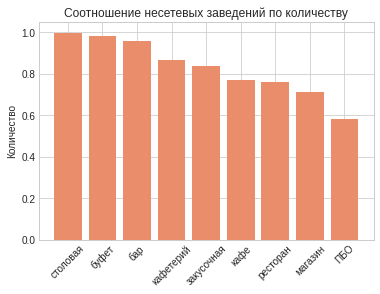

In [307]:
# Построим график
ax2 = plt.bar('object_type', 'share_not_chain', data=chain_pc.sort_values(by='share_not_chain', ascending=False), color=color[0])
plt.title('Соотношение несетевых заведений по количеству')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- Для сетевых заведений характерно большее распространение предприятий быстрого обслуживания (41% от всех ПБО), магазинов (28% от всех магазинов), ресторанов (23% от всех ресторанов)
- Для несетевых заведений характерно большее распространение столовых (99% от всех столовых), буфетов (98% от всех буфетов), баров (95% от всех баров)

### Анализ характеристик сетевых заведений

In [308]:
# Сгруппируем данные по названию сети и посчитаем медианное кол-во мест
charact = data.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'median'})

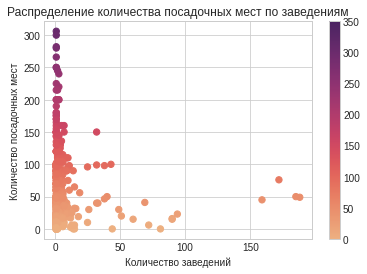

In [309]:
# Построим график
ax3 = plt.scatter(charact['id'], charact['number'], c=charact['number'], vmin=0, vmax=350, s=40, cmap="flare")
plt.colorbar(ax3)
plt.title('Распределение количества посадочных мест по заведениям')
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест')
plt.show()

**Вывод:**

- В основном, для сетей характерно не более 25 заведений, однако есть выбросы до 200.
- Чаще всего, количество посадочных мест в сетях варьируется от 0 до 150. Есть значения, достигающие отметку в 300 мест.
- Из этого следует, что для маленьких сетей больше характерно небольшое количество заведений (от 1 до 25) с различным количеством посадочных мест (от 0 до 300). Для крупных же характерно большое количество заведений с количеством мест, не превышающим сто.

### Среднее количество посадочных мест для каждого вида объекта общественного питания

In [310]:
# Сгруппируем данные и получим среднее количество мест для 
seat = data.groupby('object_type').agg({'number': 'median'}).sort_values(by='number', ascending=False)
seat

,number
object_type,
столовая,103
ресторан,80
бар,35
буфет,32
кафе,30
ПБО,6
кафетерий,6
закусочная,0
магазин,0


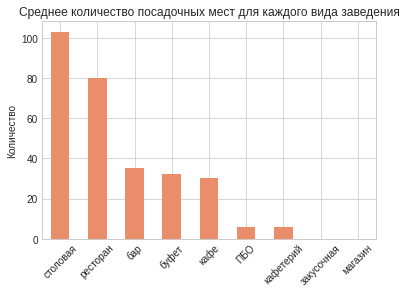

In [311]:
# Построим график
ax4 = seat.plot.bar(color=color, legend=None)
ax4.set_title('Среднее количество посадочных мест для каждого вида заведения')
ax4.set_xlabel(' ')
ax4.set_ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:**

Судя по медианному значению, больше всего посадочных мест у столовых (103), меньше всего у магазина (0). Это объясняется тем, что столовые изначально рассчитаны на большое количество посетителей, и из-за невысоких цен имеют соответсвующий спрос. Магазины же в принципе не предполагают долгое нахождение в них посетителей.

### Анализ расположения заведений общественного питания

In [312]:
# Напишем функцию для отделения улицы
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'переулок', 'проспект', 'площадь', 'аллея', 'деревня', 'квартал', 'микрорайон', 'мост', 'набережная', 'парк', 'посёлок', 'проектируемый проезд', 'просек', 'тупик', 'линия', 'километр', 'поселение', 'территория', 'город зеленоград']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e

In [313]:
# Применим функцию к датафрейму и запишем результат в отдельный столбец
data['street'] = data['address'].apply(get_street)
data['street'] = data['street'].str.strip()

In [314]:
# Посчитаем количество пропусков
data['street'].isna().sum()

0

In [315]:
# Найдем топ-10 улиц с наибольшим количеством заведений общественного питания
streets_max = data.groupby('street').agg({'id':'nunique'}).sort_values(by='id', ascending=False).head(10)
streets_max

In [241]:
# Загрузим дополнительные данные об районах Москвы
spreadsheet_id = '11ngkcwzyPTZzE0iMbYZNnXhkNgq8M1f38ZqCkYaqiYg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
areas = pd.read_csv(BytesIO(r.content))

In [318]:
# Соеденим по названию улицы встроенные данные и получим информаю о районах
streets_max = streets_max.merge(areas, left_on='street', right_on='streetname')
streets_max.head()

,id,streetname,areaid,okrug,area
0,232,город Зеленоград,51,Зеленоград,Район Крюково
1,232,город Зеленоград,52,Зеленоград,Район Матушкино-Савелки
2,232,город Зеленоград,53,Зеленоград,Панфиловский район
3,203,проспект Мира,70,СВАО,Алексеевский район
4,203,проспект Мира,86,СВАО,Ярославский Район


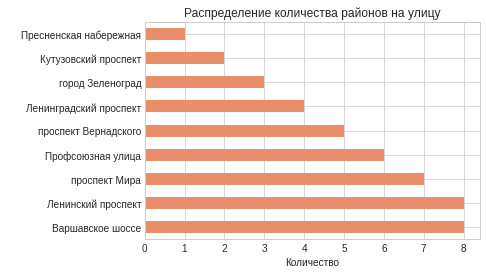

In [319]:
# Построим график
ax5 = streets_max.groupby('streetname')['area'].count().sort_values(ascending=False).plot.barh(color=color[0])
plt.title('Распределение количества районов на улицу')
plt.xlabel('Количество')
plt.ylabel(' ')
plt.show()

In [321]:
# Найдем улицы с одним заведением общественного питания
streets_min = data.groupby('street').agg({'id':'nunique'}).query('id == 1')
streets_min.head()

,id
street,
1-й Балтийский переулок,1
1-й Басманный переулок,1
1-й Ботанический проезд,1
1-й Вешняковский проезд,1
1-й Голутвинский переулок,1


In [196]:
# Аналогично соеденим по названию улицы встроенные данные и получим информаю о районах
streets_min = streets_min.merge(areas, left_on='street', right_on='streetname')

In [197]:
# Сгруппируем данные и найдем районы, где больше всего улиц с одним заведением
streets_min.groupby('area').agg({'streetname':'count'}).sort_values(by='streetname', ascending=False).head(10)

,streetname
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Пресненский район,20
Тверской район,20
Район Арбат,18
Район Марьина роща,18
Мещанский район,15
Район Сокольники,15


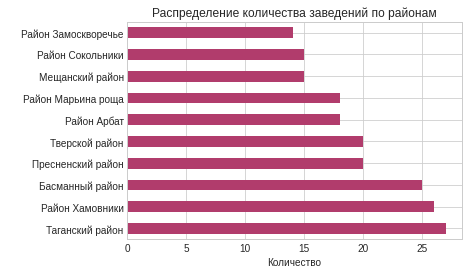

In [198]:
# Построим график
ax6 = streets_min.groupby('area').agg({'streetname':'count'}).sort_values(by='streetname', ascending=False).head(10).plot.barh(legend=None, color=color[3])
plt.title('Распределение количества заведений по районам')
plt.xlabel('Количество')
plt.ylabel(' ')
plt.show()

In [199]:
# На первый взгляд больше всего таких районов в центре, проверим, сгруппируя данные по округу
streets_min.groupby('okrug').agg({'streetname':'nunique'}).sort_values(by='streetname', ascending=False)

,streetname
okrug,
ЦАО,173
СВАО,65
ВАО,64
ЮВАО,52
САО,50
ЗАО,45
ЮАО,28
СЗАО,27
ЮЗАО,27


**Вывод:**
- Исходя из данных, мы видим, что одной улице может соответствовать от 1 до 8 районов, это значит, что на некоторых улицах много заведений из-за их большого размера, а не выгодного расположения. Улицы же которым соответствуют 1-2 района (Пресненская набережная, кутузовский проспект) вероятно действительно коммерчески более удобны. 
- Большинство заведений находятся в районе Крюково (232), так как в г. Зеленоград нет обозначений улиц, соотвественно при выделении улиц он является самым большим по площади и таким образом по количеству заведений. Вторым районом по количеству заведений является Алексеевский район (203). На заключительной позиции - Район Дорогомилово (114). В целом, большинство заведений находятся в ЗАО.
- Улицы с одним заведениям преимущественно небольшие. Топ-5 районов по количеству таковых: Таганский район (27), Район Хамовники (26), Басманный район (25), Пресненский район (20), Тверской район	(20). В целом, большинство улиц находятся в ЦАО (173).
- Вероятно, на количество заведений внутри Москвы влияет не столько близость к центру, сколько длина/размер улицы.

## Презентация

Презентация: https://disk.yandex.ru/i/yHRZn-92IY2zxw

## Общий вывод:

Таким образом, исследование было выполнено в четыре этапа:

1. Обзор данных. На этом этапе был распакован датасет, изучен на предмет пропусков и аномалий.
2. Предобработка данных. На данном этапе данные были приведены к одному виду: удалены неявные и неполные дубликаты.
3. Анализ данных. На этом этапе были изучены основные характеристики заведений общественного питания: расположение, количество посадочных мест, количество видов объектов, количество сетевых и несетевых заведений.
4. Презентация. На этом этапе была подготовлена презентация результатов исследования.

**Анализ данных: выводы**
- Топ-3 самых многочисленных видов заведений: кафе (6099), столовая (2587), ресторан (2285). Топ-3 самых немногочисленных: магазин (отдел кулинарии) (273), закусочная (360), кафетерий (398)
- Несетевых заведений (12398) гораздо больше сетевых (2968).
- Для сетевых заведений характерно большее распространение предприятий быстрого обслуживания (41% от всех ПБО), магазинов (28% от всех магазинов), ресторанов (23% от всех ресторанов)
- Для несетевых заведений характерно большее распространение столовых (99% от всех столовых), буфетов (98% от всех буфетов), баров (95% от всех баров)
- Для маленьких сетей характерно небольшое количество заведений (от 1 до 25) с различным количеством посадочных мест (от 0 до 300). Для крупных же характерно большое количество заведений с количеством мест, не превышающим ста.
- Топ-5 районов по количеству заведений на улице: Район Крюково (232), Алексеевский район (203), Академический район (182), Район Аэропорт (172), Пресненский район (167).
- Топ-5 районов по количеству улиц с одним заведением: Таганский район (27), Район Хамовники (26), Басманный район (25), Пресненский район (20), Тверской район	(20). В целом, большинство улиц находятся в ЦАО (173).

**Рекомендации:**

- Судя по формату заведения - наиболеее подходящим видом будет кафе. Роботы - новвоведение, которое больше заинтересует обеспеченную молодежь - основных посетителей кафе, нежели посетителей столовых и ресторанов, которых приходят туда за низкими ценами и быстрой подачей или напротив за классической изысканной кухней. Также, судя по данным, доля кафе среди сетевых заведений составляет пости 50 процентов, что может говорить о том, что таким заведениям удается лучше закрепиться на рынке. 
- Исходя из полученных данных, количество мест в кафе может разниться. Однако, если брать во внимание специфику заведения, то лучше ограничиться посадкой в 30-40 мест, что характерно для кафе и удобно с точки зрения обслуживания роботами. Также для сохранения эксклюзивности заведения рекомендуется открывать не более 5-10 кафе.
- Наиболее удачным местом расположения будут центральные районы и районы в пределах или рядом с ТТК (пресненский район, алексеевский район), так как в центре большой поток туристов и отдыхающих. А за кольцом и в пределах ТТК ниже стоимость аренды, но все еще высокая транспортная доступность. 
- Окупаемость и развитие сети будет зависить от руководства и выбранной экономической модели, однако если придерживаться рекомендаций вероятно кафе сможет занять свою нишу.